In [1]:
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

df = pd.read_csv('Property_with_Feature_Engineering.csv')
df.head()



,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [2]:
#getting rows and columns
df.shape

(191393, 24)

In [3]:
#getting unique names of the cities present in dataset

df['city'].unique()

array(['Lahore', 'Karachi', 'Islamabad', 'Faisalabad', 'Rawalpindi'],
      dtype=object)

In [4]:
#lets predict the housing price of LAhore city

df = df[df['city'] == 'Karachi']
df.head()


,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
217,86575,6649,https://www.zameen.com/Property/faisal_cantonm...,House,450000000,Very High,Cantt,Karachi,Sindh,"Cantt, Karachi, Sindh",...,80.0,21780.08,For Sale,6,06-20-2019,2019,6,20,Premier Properties,Aamir Motiwala
218,342005,232,https://www.zameen.com/Property/karachi_gulist...,House,35000000,Very High,Gulistan-e-Jauhar,Karachi,Sindh,"Gulistan-e-Jauhar, Karachi, Sindh",...,16.0,4356.02,For Sale,6,07-18-2019,2019,7,18,NaN,NaN
219,466607,1484,https://www.zameen.com/Property/d_h_a_dha_phas...,Flat,21000000,Very High,DHA Defence,Karachi,Sindh,"DHA Defence, Karachi, Sindh",...,8.9,2423.03,For Sale,3,10-20-2018,2018,10,20,NaN,NaN
220,678919,9594,https://www.zameen.com/Property/malir_malir_ka...,House,6500000,Low,Malir,Karachi,Sindh,"Malir, Karachi, Sindh",...,3.2,871.20,For Sale,2,03-10-2019,2019,3,10,NaN,NaN
221,813506,6732,https://www.zameen.com/Property/surjani_town_s...,House,13000000,Medium,Gadap Town,Karachi,Sindh,"Gadap Town, Karachi, Sindh",...,9.6,2613.61,For Sale,4,07-18-2019,2019,7,18,NaN,NaN


In [5]:
df.shape

(60484, 24)

# EXPLORATORY DATA  ANALYSIS

In [6]:
# Droping the unnecessary Data (coloums) Like

# dropping unnecessary columns

df = df.drop(["location_id","page_url","province_name","locality","area_marla","year","month","day","agency","agent","latitude","longitude","property_id","property_type","price_bin","purpose","date_added","city","area"], axis=1)

In [7]:
df = df.reset_index()
df = df.drop("index",axis=1)
df.head()

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
2,21000000,DHA Defence,3,2423.03,3
3,6500000,Malir,1,871.20,2
4,13000000,Gadap Town,4,2613.61,4


In [8]:
# Checking for Null values in columns

df.isna()  # hence is there is no null value

,price,location,baths,area_sqft,bedrooms
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
60479,False,False,False,False,False
60480,False,False,False,False,False
60481,False,False,False,False,False
60482,False,False,False,False,False


In [9]:

matplotlib.rcParams["figure.figsize"] = (20,10)

df.shape

(60484, 5)

# DATA CLEANING

In [10]:
# checking for Unique number of bathrooms in house 

df['baths'].unique()

array([ 7,  8,  3,  1,  4,  6,  0,  5,  2,  9, 10, 13, 11, 12],
      dtype=int64)

So, you can see there are 0 
to 15 bath in a house which is prolly a typo

In [11]:
df[df['baths']> 10] 
# there are 7 homes having bathroom greater than 10.

,price,location,baths,area_sqft,bedrooms
32750,240000000,Jamshed Town,13,10890.04,10
32830,180000000,Darul Aman Society,11,5172.77,9
41837,120000000,Jamshed Town,12,10890.04,9
48810,1000000,DHA Defence,12,21780.08,10
54193,70000000,Gulshan-e-Iqbal Town,12,353.93,8
56814,140000000,Clifton,13,8167.53,10
57008,80000000,Jamshed Town,12,4356.02,10


In [12]:
# checking for Unique number of bedrooms in house

df['bedrooms'].unique()


array([ 6,  3,  2,  4,  7,  5, 11,  0,  1,  9,  8, 10, 15, 12, 14, 13, 16,
       68, 25], dtype=int64)

So you can see there total bedrooms is upto 20 which is prolly a typo
lets check the dataset for bedrooms having more than ten bedrooms

In [13]:
df[df['bedrooms']> 10]

,price,location,baths,area_sqft,bedrooms
20,40000000,Nazimabad,8,3648.16,11
307,10500000,Liaquatabad,10,980.10,11
652,25000000,Malir,5,3049.21,11
693,26000000,Gulistan-e-Jauhar,10,2613.61,11
895,370000,Shahra-e-Faisal,10,4356.02,11
...,...,...,...,...,...
55102,450000,Gulshan-e-Iqbal Town,0,8167.53,15
55103,900000,Gulshan-e-Iqbal Town,0,16335.06,25
55539,250000,North Nazimabad,0,4900.52,15
55540,250000,North Nazimabad,0,6534.02,12


In [14]:
pk = df[(df['bedrooms']==0)]
pk

,price,location,baths,area_sqft,bedrooms
45,72500000,Gulshan-e-Iqbal Town,0,6534.02,0
59,6000000,Bahria Town Karachi,2,1143.45,0
118,5049000,Scheme 33,2,1089.00,0
145,14500000,Scheme 33,0,4356.02,0
164,155000000,DHA Defence,0,7078.53,0
...,...,...,...,...,...
60427,29500000,North Nazimabad,0,2531.93,0
60428,47500000,North Nazimabad,0,4791.62,0
60462,29000000,North Nazimabad,0,2531.93,0
60464,250000000,North Nazimabad,0,21780.08,0


In [15]:
# removing more than 5 bedrooms wale houses

df = df.drop(df[(df['baths']==0) & (df['bedrooms'] > 3)].index)
df

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
2,21000000,DHA Defence,3,2423.03,3
3,6500000,Malir,1,871.20,2
4,13000000,Gadap Town,4,2613.61,4
...,...,...,...,...,...
60477,14000000,Bahria Town Karachi,4,3811.51,4
60478,4800000,Gadap Town,0,1034.55,2
60480,12500000,Gadap Town,0,2178.01,3
60482,11000000,Gadap Town,0,2123.56,3


In [16]:
# droping columns having 0 baths and 0 bedrooms

df = df.drop(df[(df['bedrooms']==0) | (df['baths']==0)].index)
df

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
2,21000000,DHA Defence,3,2423.03,3
3,6500000,Malir,1,871.20,2
4,13000000,Gadap Town,4,2613.61,4
...,...,...,...,...,...
60474,8800000,Bahria Town Karachi,4,2178.01,3
60475,5000000,Bahria Town Karachi,4,1361.25,3
60476,14000000,Bahria Town Karachi,3,2178.01,3
60477,14000000,Bahria Town Karachi,4,3811.51,4


In [17]:
#finding is there any home in which number of baths is more than bedrooms since is uncommon

df[df['baths'] > df['bedrooms']] #you could see there are about 20720 houses whose number of baths is more than bedroom we have to handle it 

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
9,12800000,Scheme 33,6,2613.61,5
11,34000000,Cantt,4,3103.66,3
16,17000000,Gulshan-e-Iqbal Town,5,1306.80,4
...,...,...,...,...,...
60469,14000000,Bahria Town Karachi,4,1633.51,3
60470,9500000,Bahria Town Karachi,4,1660.73,3
60471,14000000,Bahria Town Karachi,5,3811.51,4
60474,8800000,Bahria Town Karachi,4,2178.01,3


# Outliers Detection

In [18]:
# adding new column "price per sqr-ft"

df['price_per_sqft'] = df['price'] / df['area_sqft']
df

,price,location,baths,area_sqft,bedrooms,price_per_sqft
0,450000000,Cantt,7,21780.08,6,20661.081135
1,35000000,Gulistan-e-Jauhar,8,4356.02,6,8034.857508
2,21000000,DHA Defence,3,2423.03,3,8666.834501
3,6500000,Malir,1,871.20,2,7460.973370
4,13000000,Gadap Town,4,2613.61,4,4973.963216
...,...,...,...,...,...,...
60474,8800000,Bahria Town Karachi,4,2178.01,3,4040.385490
60475,5000000,Bahria Town Karachi,4,1361.25,3,3673.094582
60476,14000000,Bahria Town Karachi,3,2178.01,3,6427.886006
60477,14000000,Bahria Town Karachi,4,3811.51,4,3673.084945


In [19]:
l = df['location'].unique()
l

array(['Cantt', 'Gulistan-e-Jauhar', 'DHA Defence', 'Malir', 'Gadap Town',
       'Gulshan-e-Iqbal Town', 'Scheme 33', 'Abul Hassan Isphani Road',
       'Nazimabad', 'Falcon Complex Faisal', 'Shahra-e-Faisal', 'Gizri',
       'Saddar Town', 'Navy Housing Scheme Karsaz', 'Bahria Town Karachi',
       'Jinnah Avenue', 'PAF Housing Scheme', 'North Nazimabad',
       'Clifton', 'Northern Bypass', 'Fazaia Housing Scheme',
       'New Karachi', 'Shaheed Millat Road', 'North Karachi',
       'Anda Mor Road', 'Lyari Town', 'Bath Island',
       'Defence View Society', 'Federal B Area', 'P & T Colony',
       'Sea View Apartments', 'Baldia Town', 'Jamshed Town', 'Zamzama',
       'Gulshan-e-Usman Housing Society', 'Liaquatabad', 'Garden West',
       'Chapal Uptown', 'Baloch Colony', 'Manzoor Colony', 'Delhi Colony',
       'Airport', 'Shah Faisal Town', 'University Road', 'Hill Park',
       'Malir Link To Super Highway', 'Falaknaz Presidency',
       'Bin Qasim Town', 'Gulberg Town', 'Super 

In [20]:
len(l) # so there are about 199 unique locations

199

In [21]:
df['location']=df['location'].apply(lambda x: x.strip())

In [22]:
no_of_houses = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
no_of_houses.head(100)

location
DHA Defence              8688
Bahria Town Karachi      7870
Gulistan-e-Jauhar        4332
Gulshan-e-Iqbal Town     3658
Gadap Town               2230
                         ... 
Cosmopolitan Society       13
Punjab Chowrangi           13
Al-Hilal Society           13
Falcon Complex Faisal      12
PTV Society                11
Name: location, Length: 100, dtype: int64

In [23]:
len(no_of_houses[no_of_houses <= 10 ])

98

In [24]:


Houses_less_than_10=no_of_houses[no_of_houses <= 10]
Houses_less_than_10

location
Manghopir Road                10
Gulshan-e-Areesha             10
Guru Mandir Chorangi          10
Dalmia Cement Factory Road     9
Gizri Road                     9
                              ..
Gobal Town                     1
Goth Ibrahim Haidri            1
Hoshang Road                   1
Shah Rasool Colony             1
PIDC                           1
Name: location, Length: 98, dtype: int64

In [25]:
df['location'] = df['location'].apply(lambda A:'others' if A in Houses_less_than_10 else A)

df['location'].nunique()


102

In [26]:
# I am considering common bedroom area which is 500-700 sqt-ft in pakistan. Any bedroom area which is less than 300 sqr-ft will be consder as outlier

df[df['area_sqft'] / df['bedrooms'] < 300]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
5,32000000,DHA Defence,4,1089.00,4,29384.756657
6,4000000,Malir,3,871.20,7,4591.368228
41,4500000,Saddar Town,1,353.93,2,12714.378549
53,100000000,Gulshan-e-Iqbal Town,9,2613.61,9,38261.255505
91,3500000,Abul Hassan Isphani Road,3,1388.48,5,2520.742106
...,...,...,...,...,...,...
60363,26000,DHA Defence,2,598.95,2,43.409300
60396,110000,DHA Defence,4,598.95,3,183.654729
60399,22000,DHA Defence,1,108.90,1,202.020202
60405,12000000,North Karachi,5,1306.80,5,9182.736455


In [27]:
# so there are about 3601   houses having area less than 300 sqr-ft. get rid of them.

df = df.drop(df[df['area_sqft'] / df['bedrooms'] < 300].index)
df

,price,location,baths,area_sqft,bedrooms,price_per_sqft
0,450000000,Cantt,7,21780.08,6,20661.081135
1,35000000,Gulistan-e-Jauhar,8,4356.02,6,8034.857508
2,21000000,DHA Defence,3,2423.03,3,8666.834501
3,6500000,Malir,1,871.20,2,7460.973370
4,13000000,Gadap Town,4,2613.61,4,4973.963216
...,...,...,...,...,...,...
60474,8800000,Bahria Town Karachi,4,2178.01,3,4040.385490
60475,5000000,Bahria Town Karachi,4,1361.25,3,3673.094582
60476,14000000,Bahria Town Karachi,3,2178.01,3,6427.886006
60477,14000000,Bahria Town Karachi,4,3811.51,4,3673.084945


# Feature Extraction 

In [28]:
df['price_per_sqft'].describe()

count     43904.000000
mean       6658.211901
std        6461.973477
min           0.000184
25%         713.254332
50%        5684.526282
75%        9305.115977
max      316802.953154
Name: price_per_sqft, dtype: float64

In [29]:
# removing price_per_sqft outliers 
def remove_pps_outliers(df):
    result_df = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        standrd_deviation = np.std(subdf['price_per_sqft'])
        m_s=mean-standrd_deviation
        m_plus_std=mean+standrd_deviation
        reduced_df = subdf[(subdf['price_per_sqft'] > (m_s)) & (subdf['price_per_sqft'] <= (m_plus_std))]
        result_df = pd.concat([result_df,reduced_df], ignore_index=True)
    return result_df

In [30]:
df = remove_pps_outliers(df)
df.shape

(29598, 6)

In [31]:


def plotting_bedroom_outlier(df, location):
    
    bedroom_2 = df[(df['location'] == location) & (df['bedrooms'] == 2)]
    bedroom_3 = df[(df['location'] == location) & (df['bedrooms'] == 3)]
    #matplotlib.rcParams["figure.figsize"] = (15,10)
    
    price_in_lac_b2 = bedroom_2['price']/100000
    price_in_lac_b3 = bedroom_3['price']/100000
    
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='hotpink', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='x', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Square Feet Area")
    plt.ylabel("Price (In Lacs)")
    plt.title(location)
    plt.colorbar()
    plt.legend()

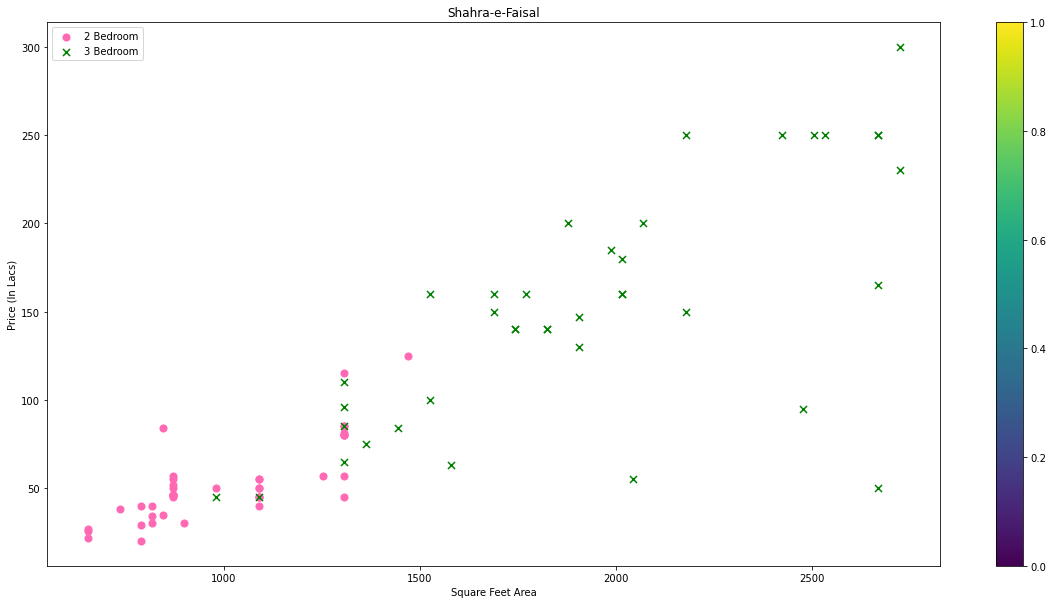

In [32]:
plotting_bedroom_outlier(df, "Shahra-e-Faisal")


In [33]:
def removing_bedroom_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            bhk_stats[bedroom] = {
                'mean' : np.mean(bedroom_df["price_per_sqft"]),
                'std' : np.std(bedroom_df["price_per_sqft"]),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            stats = bhk_stats.get(bedroom - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index") 

In [34]:
df = removing_bedroom_outlier(df)
df.shape

(17116, 6)

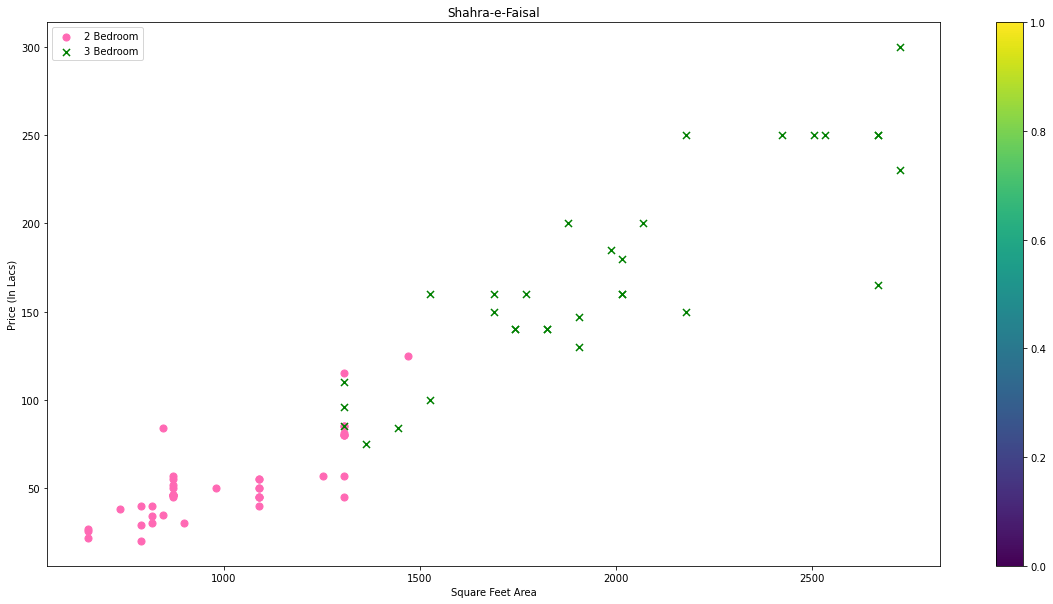

In [35]:
plotting_bedroom_outlier(df,"Shahra-e-Faisal")

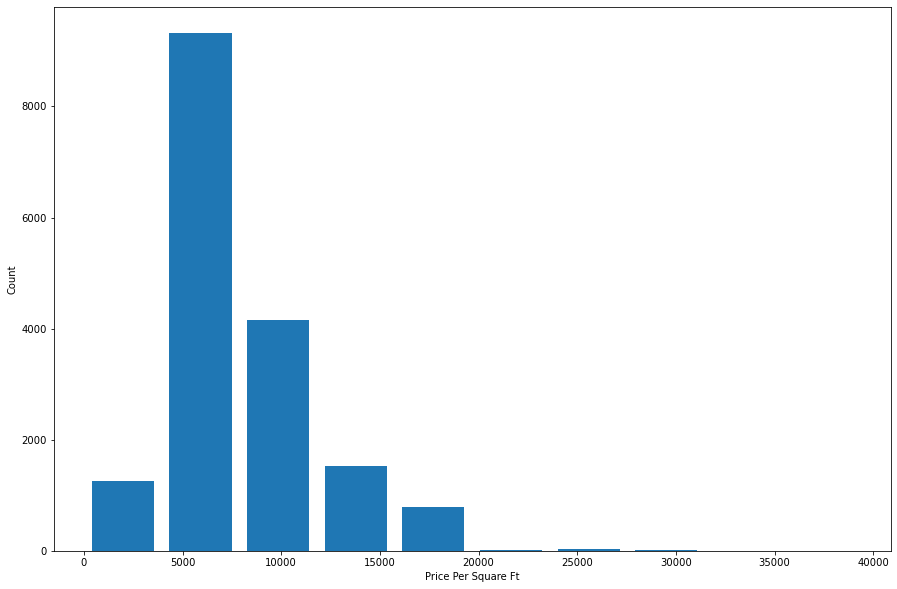

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

In [37]:
df[df['baths'] > df['bedrooms']]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
1,5500000,Abid Town,3,1089.00,2,5050.505051
18,3800000,Abul Hassan Isphani Road,3,1034.55,2,3673.094582
35,3200000,Abul Hassan Isphani Road,3,1442.93,2,2217.709799
102,9500000,Airport,3,1524.61,2,6231.101724
160,5500000,Aisha Manzil,3,871.20,2,6313.131313
...,...,...,...,...,...,...
29548,15000000,others,6,1306.80,4,11478.420569
29562,18000000,others,8,2613.61,7,6887.025991
29575,27500000,others,4,2423.03,3,11349.426132
29582,12500000,others,3,1388.48,2,9002.650380


In [38]:
df[df['baths'] > (df['bedrooms'] + 2)]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
1754,38400000,Bahria Town Karachi,8,5445.02,5,7052.315694
5604,40000000,Cantt,10,3593.71,4,11130.558671
6438,9000000,Clifton,6,898.43,2,10017.474928
7303,50000,Clifton,5,1197.90,2,41.739711
7582,24500000,DHA City Karachi,6,38115.14,2,642.789191
8773,85000000,DHA Defence,8,5445.02,5,15610.594635
9406,100000000,DHA Defence,8,5445.02,5,18365.405453
10915,95000000,DHA Defence,8,6534.02,5,14539.288218
10964,85000000,DHA Defence,6,5445.02,3,15610.594635
14317,20000,Defence View Society,7,871.20,2,22.956841


In [39]:
df = df.drop(df[df['baths'] > (df['bedrooms'] + 2)].index)
df.shape

(17085, 6)

In [40]:
df


,price,location,baths,area_sqft,bedrooms,price_per_sqft
0,8500000,Abid Town,3,1932.98,3,4397.355379
1,5500000,Abid Town,3,1089.00,2,5050.505051
2,6500000,Abid Town,3,1089.00,3,5968.778696
3,5600000,Abid Town,2,1442.93,2,3880.992148
4,8150000,Abid Town,3,1388.48,3,5869.728048
...,...,...,...,...,...,...
29593,30000000,others,4,2668.06,4,11244.124945
29594,28500000,others,4,2668.06,4,10681.918697
29595,7500000,others,2,1089.00,2,6887.052342
29596,5200000,others,2,980.10,2,5305.581063


In [41]:
df1 = df.drop("price_per_sqft", axis=1)

In [42]:
dummies = pd.get_dummies(df1['location'])
dummies


,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,Anda Mor Road,Azam Town,Bagh-e-Korangi,Bahria Town Karachi,...,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df1 = pd.concat([df1, dummies.drop('others', axis=1)], axis="columns")
df1 = df1.drop("location", axis=1)
df1.head()
df1.shape

(17085, 105)

In [44]:
df1.head()

,price,baths,area_sqft,bedrooms,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,...,Shahra-e-Faisal,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama
0,8500000,3,1932.98,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5500000,3,1089.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6500000,3,1089.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5600000,2,1442.93,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8150000,3,1388.48,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MODEL BUILDING AND EVALUATION

In [45]:
X = df1.drop('price', axis=1) # Features
X

,baths,area_sqft,bedrooms,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,Anda Mor Road,...,Shahra-e-Faisal,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama
0,3,1932.98,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1089.00,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1089.00,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1442.93,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1388.48,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29593,4,2668.06,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29594,4,2668.06,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29595,2,1089.00,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29596,2,980.10,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y = df1['price'] 
y

0         8500000
1         5500000
2         6500000
3         5600000
4         8150000
           ...   
29593    30000000
29594    28500000
29595     7500000
29596     5200000
29597     7500000
Name: price, Length: 17085, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split # for dividing data into training and test sets
from sklearn.linear_model import LinearRegression # for predicting price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8371271499563047

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82409662, 0.86694765, 0.81835746, 0.83910549, 0.83268318])

In [49]:
# importing other regression models to find the best performing model using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [50]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model':LinearRegression(),
            'params': {'normalize':[True,False]}
    
        },'decision_tree_regressor':{
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse','friedman_mse'], 'splitter':['best','random']}
        },'lasso': {
            'model':Lasso(),
            'params': {'alpha':[1,2], 'selection':['random','cyclic']}
        }
    }
    
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=False, n_jobs=-1, cv=cv)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_ ,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [51]:
find_best_model_using_gridsearchcv(X, y)

C:\Users\Abdul Rehman\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.836238,{'normalize': True}
1,decision_tree_regressor,0.940833,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,lasso,0.836239,"{'alpha': 2, 'selection': 'cyclic'}"


In [52]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', random_state=0)
dtr.fit(X.values, y)

DecisionTreeRegressor(criterion='friedman_mse', random_state=0,
                      splitter='random')

In [53]:
X.columns

Index(['baths', 'area_sqft', 'bedrooms', 'Abid Town',
       'Abul Hassan Isphani Road', 'Airport', 'Aisha Manzil',
       'Al-Hilal Society', 'Amir Khusro', 'Anda Mor Road',
       ...
       'Shahra-e-Faisal', 'Shahra-e-Qaideen', 'Shahrah-e-Pakistan',
       'Sindh Industrial Trading Estate (SITE)', 'Suparco Road',
       'Super Highway', 'Tariq Road', 'Tipu Sultan Road', 'University Road',
       'Zamzama'],
      dtype='object', length=104)

In [54]:
def predict_price(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = sqft
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    return dtr.predict([x])[0] / 100000

In [55]:
training_data_prediction = lr.predict(X_train)

In [56]:
# import seaborn as sns
# predictions = lr.predict(X_test)
# sns.distplot((y_test-predictions),bins=50);

In [57]:
print(str(int(predict_price('Nazimabad', 1800, 4, 3))) + " Lakhs")

160 Lakhs


In [58]:
print(str(int(predict_price('Scheme 33', 1080, 3, 2))) + " Lakhs")

80 Lakhs


In [59]:
# exporting model using pickle 

import pickle
with open('Karachi_model.pickle','wb') as K_m:
    pickle.dump(dtr, K_m)

In [60]:
import json
columns = {
    'col_name' : [col.lower() for col in X.columns]
}
with open("cols.json","w") as f:
    f.write(json.dumps(columns))